# Correlations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', size=15) 

C:\Users\luetma00\AppData\Local\Temp\ipykernel_19700\2651425225.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In the following we simulate some data, where we control how the two random variables correlate. 
By making the dependency strong, we can obtain larger correlation values (e.g. if $x = y$ and there is no noise, we obtain a correlation of $1$. 

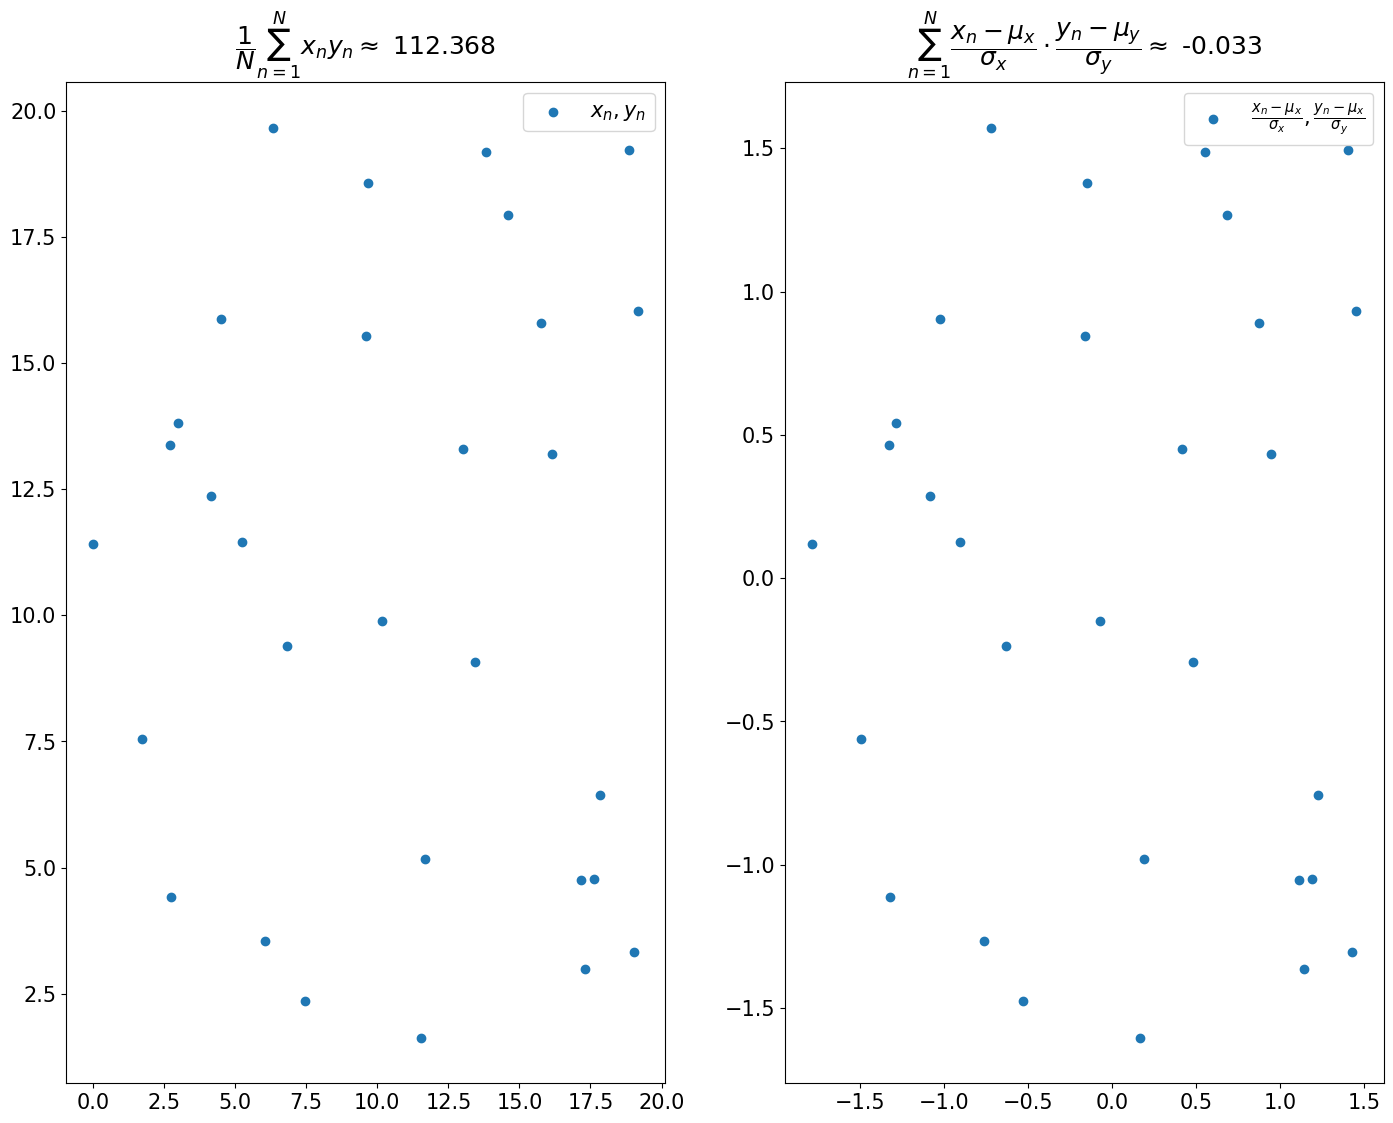

In [2]:
n_samples = 30
scale = 20

x = scale * np.random.rand(n_samples)
y = scale * np.random.rand(n_samples)

fig, axs = plt.subplots(1, 2, figsize=(17, 13))

axs[0].scatter(x, y)
axs[0].set_title("$\\dfrac{1}{N} \\sum_{n=1}^N x_n y_n \\approx$ %.3f" % (np.mean(x * y)))
axs[0].legend(["$x_n, y_n$"], loc="upper right")


x_c = x - x.mean()
y_c = y - y.mean()
sigma_x = np.sqrt(np.mean(x_c**2))
sigma_y = np.sqrt(np.mean(y_c**2))
x_c_norm = x_c / sigma_x
y_c_norm = y_c / sigma_y

axs[1].scatter(x_c_norm, y_c_norm)
axs[1].set_title("$\\sum_{n=1}^N \\dfrac{x_n - \\mu_x}{\\sigma_x} \\cdot \\dfrac{y_n - \\mu_y}{\\sigma_y} \\approx$ %.3f" % (np.mean(x_c_norm * y_c_norm)))
axs[1].legend(["$\\frac{x_n - \\mu_x}{\\sigma_x}, \\frac{y_n - \\mu_x}{\\sigma_y}$"], loc="upper right")

## Heights of parents and children

The following dataset contains information about the heights of parents and their offspring.

In [4]:
import pandas as pd

df = pd.read_csv("../data/galton-families.csv")
df.head()

,Unnamed: 0,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,0,001,78.5,67.0,75.43,4,1,male,73.2
1,1,001,78.5,67.0,75.43,4,2,female,69.2
2,2,001,78.5,67.0,75.43,4,3,female,69.0
3,3,001,78.5,67.0,75.43,4,4,female,69.0
4,4,002,75.5,66.5,73.66,4,1,male,73.5


We compute the correlation coefficient and plot the data:

In [5]:
def corrcoeff(x, y):
    x_c = x - x.mean()
    y_c = y - y.mean()
    s_x = np.sqrt(np.mean(x_c**2))
    s_y = np.sqrt(np.mean(y_c**2))

    return np.mean(x_c * y_c) / s_x / s_y 

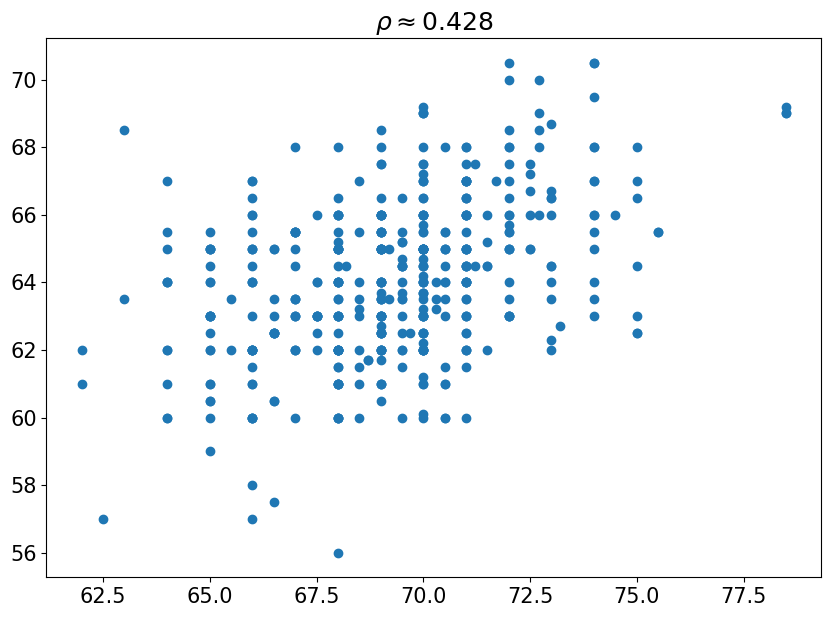

In [7]:
daughters = df[df.gender == "female"]
sons = df[df.gender == "male"]

fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(daughters["father"], daughters["childHeight"])
ax.set_title("$\\rho \\approx$%.3f" % (corrcoeff(daughters["father"], daughters["childHeight"])));

The correlation coefficient is a random variable, as it depends on the (randomly sampled) data. 
The following bootstrap simulation shows the estimated distribution of the correlation coefficients. 

Text(0.5, 0, 'Correlation coefficient $\\rho$')

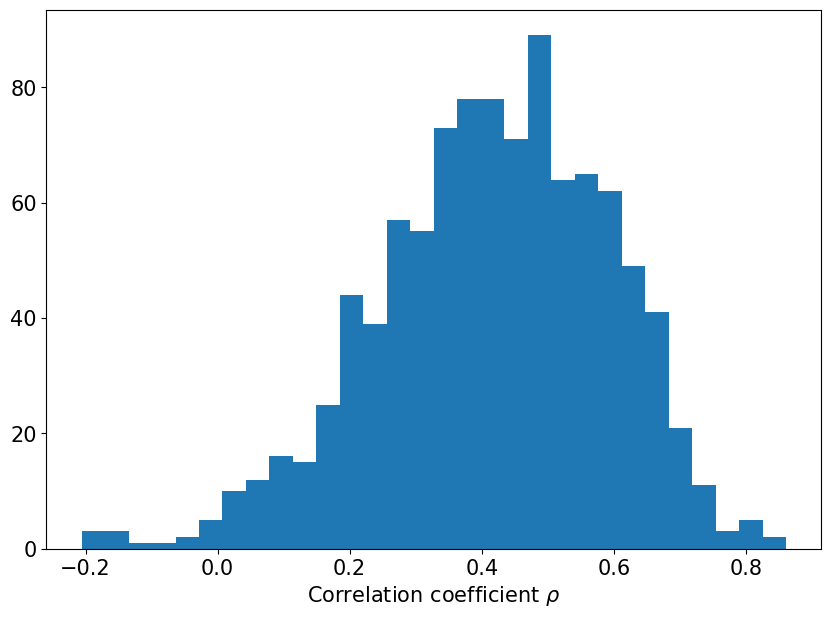

In [11]:
import random

N = 25
n_boot = 1000

#daughters.reset_index()

cc = []
for i_mc in range(n_boot):
    idx = np.random.randint(0, len(daughters), size=N)
    sample = daughters.iloc[idx]
    x = sample["father"].to_numpy()
    y = sample["childHeight"].to_numpy()
    cc.append(corrcoeff(x, y))

fig, ax = plt.subplots(figsize=(10, 7))
plt.hist(cc, bins=30)
ax.set_xlabel("Correlation coefficient $\\rho$")


The following plot shows the data with the regression line. In the slides you see how the regression line can be computed. Using seaborn, we can add the regression line without computing it ourselves. It also shows an estimate of the uncertainty. 

<Axes: xlabel='father', ylabel='childHeight'>

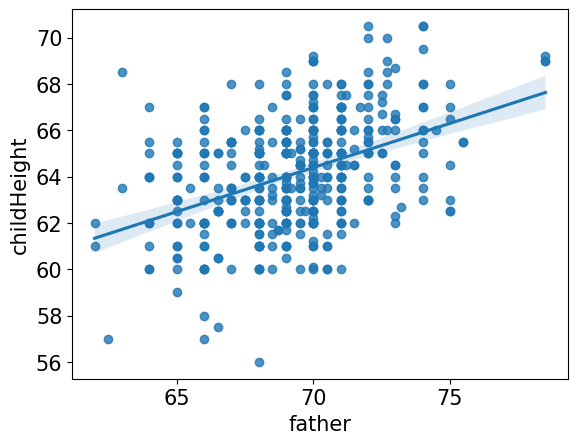

In [84]:
sns.regplot(data=daughters, x="father", y="childHeight")